# Big Data Mining, 52002/52019 - 2023-24 - Final Assignment - Part 2 : Networks [42 pts]
### **Instructions:**
* **Fill your ID Here:** 346462534
* Work on the assignment and submit your solution **individually**. <br>
No sharing of information on the assignment is allowed between student.


* **Format:** Fill code, text explanations and output (figures, tables ..) in the designated places. <br>For most questions, the code you fill should run in this .ipynb notebook and generate the output automatically after running (e.g. in `google colab`). <br>For others, you will need to run commands in other environments (e.g. unix) - in this case, just copy the commands and the relevant outputs in the designated text blocks.
* Submit your filled solution by July 31st 23:59 your solution on moodle.

* **Grading:** There are six questions in this part. Each question in this part is worth 7 points for your final grade (total: 80 points)

* **Note:** Points from your grade may be deducted for submitting wrong/missing parts of files OR if not submitting the complete generated/complied output. Make sure to run the .ipynb notebook and save it before submitting.
* **Note:** Some parts of the code might take up to several hours to run.Be patient. However don't leave everything to run at the last minute but prepare in advance so that your entire solution runs and finishes on time.

FOR SUBMISSION:
PLEASE SUBMIT THE FOLLOWING:
1. Your fully executed IPYNB file (with the expected output)
2. A PDF/HTML import of your executed IPYNB file (with the expected output)

SUBMISSIONS WITHOUT OUTPUTS WILL NOT BE GRADED!!

* **Good luck!**


**Q1.** Extract the English wikipedia network file for 2002 from the wikipedia networks dataset available in [here](https://zenodo.org/record/2539424) and load it into python.  <br>
This **directed** network describe *links* between wikipedia pages, where each node corresponds to a page, and each edge corresponds to a link from the first to the second page. Each network describes connections between pages of different languages and years (...). <br>

Compute the in-degree and out-degree of every node (in the **directed** network), and list the IDs of the five nodes (webpages) with the highest out-degree along with their degrees. Repeat for the nodes with the highest in-degree.  <br>
Next, compute the `degree distribution` of the graph, i.e. the relative frequency $f_k$ (out of $n$ nodes) of nodes having in or out-degree $k$ for every $k$ from $0$ to the maximal degree.

Plot the degree distributions, i.e. degree $f_k$ as a function of $k$ for the in and out-degrees separately. You may use a log transformation to improve readability of the plot.

**Q2.**
Next, convert the network to an **undirected** network, by including the edge $(i,j)$ whenever either the edge $(i,j)$ or the edge $(j,i)$ (or both) belong to the network.

Simulate a random graph using the `Erdos-Renyi` model with the same number of nodes $n$ as the real **undirected** network, and with edge probability $p$ chosen such that the `expected` number of overall edges in the simulated random graph is equal to the actual number of edges in the real network.
Compute and plot the degree distributions for the true *undirected* network
and of the random graph you have generated on the same figure.
<br>
Is the `Erdos-Renyi` model a good generative model for the true graph, based on the degree distribution? # does it seem to give a power-law degree distribution?


**Q3.** Run the PageRank algorithm with $\beta=0.85$ on the (directed) network until convergance with tolerance $\epsilon < 0.000001$.
Report the ten pages with the highest PageRank values.
Make a scatter plot of the PageRank score vs. the in-degress of the pages.
Next, make a similar scatter plot the PageRank score vs. the out-degrees.
Explain the two plots.

**Remark** Plotting large datasets may be challenging computationally and/or visually. In these cases (here and possibly in other questions), you may plot only a subset of the data (e.g. by random sampling, or choosing a subset based on some criteria). If you do so, explain clearly your choices when visualizing the data.

**Q4.** Run the `Topic-Specific PageRank` algorithm with the topic (i.e. teleport set) being all pages containing `Sports` in their name. Display the resulting top 10 pages.

Next, make another cateogry of your choice based on the strings describing the word names, and set all the pages in this category as your teleport set. Repeat the Topic-Specific PageRank computation for this set and report the top $10$ pages.


**Q5.**
Run the `Louvain` algorithm available in `networkx` for finding the community structure for the **undirected** graph, implemented in the `community` python module. Report the number of communities found.  <br>
Compute and report the resulting `Modularity` you got for the network division to communities.

Next, unite all the small communities with fewer than $100$ nodes into one 'super community'. Then, display the network together with the community information (in colors) using `networkx`.

**Q6.** Choose the $5$ largest communities from the previous question and extract the node names for them.
For each community, extract the actual html page for the pages corresponding to the nodes of this community.
Display the most frequent words in the html pages of each community (you can use a bar plot, a word cloud or other methods of your choice showing what words are frequent) and use the words statistics to give an interpretation to each community.
You should include only English words - remove 'words' containing numbers, special characters etc. Remove also all common short words (e.g. 'the', 'and', 'a' ...) known as 'stop-words'. This can be done using the 'nltk' python module.




SOLUTIONS:

In [1]:
from networkx.algorithms import community

In [49]:
# General code
import csv
from operator import itemgetter
import networkx as nx  # networkx - python library for dealing with graphs
from networkx.algorithms import community # This part of networkx, for community detection, needs to be imported separately.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import gzip
from community import community_louvain
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)




Mounted at /content/drive/


In [35]:
# Define the file path in Google Drive
file_path = '/content/drive/My Drive/enwiki.wikilink_graph.2002-03-01.csv'

# loading the network data from the CSV file
with gzip.open(file_path, 'rt') as f:
    # Print the first few lines of the CSV file
    for i in range(5):  # Print the first 5 lines
        line = f.readline()
        print(line)

page_id_from	page_title_from	page_id_to	page_title_to

12	Anarchism	1023	Anarcho-capitalism

12	Anarchism	15247542	Atheism

12	Anarchism	39490694	Benjamin Tucker

12	Anarchism	5416	Capitalism



Top 5 nodes with highest out-degree:
Node: 14964	International Tropical Timber Agreement, Out-Degree: 54
Node: 14963	International Tropical Timber Agreement, Out-Degree: 51
Node: 28071	September 11, Out-Degree: 51
Node: 24874360	Horatio Nelson, Out-Degree: 46
Node: 2112961	List of gay, Out-Degree: 41

Top 5 nodes with highest in-degree:
Node:  Holy Roman Emperor, In-Degree: 83
Node:  D.C., In-Degree: 69
Node:  Michigan, In-Degree: 33
Node:  California, In-Degree: 28
Node:  New York, In-Degree: 27


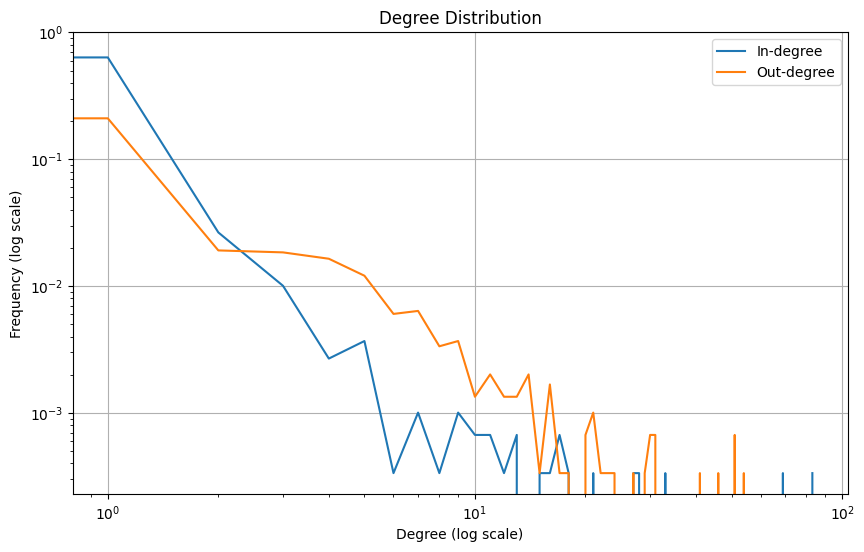

In [4]:
# Q1. Code for reading the wikipedia networks here:
# we used the library matplotlib.pyplot for plotting the degree distributions of the graph

with gzip.open(file_path, 'rt') as f:
    graph = nx.read_edgelist(f, delimiter=",", create_using=nx.DiGraph(), nodetype=str, data=False)

# compute the in-degree and out-degree of every node
in_degrees = dict(graph.in_degree())
out_degrees = dict(graph.out_degree())

# find nodes with the highest out-degree and in-degree
top_out_degrees = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
top_in_degrees = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes with highest out-degree:")
for node, degree in top_out_degrees:
    print(f"Node: {node}, Out-Degree: {degree}")

print("\nTop 5 nodes with highest in-degree:")
for node, degree in top_in_degrees:
    print(f"Node: {node}, In-Degree: {degree}")

# get the maximum degree
max_degree = max(max(in_degrees.values()), max(out_degrees.values()))

in_degree_dist = [0] * (max_degree + 1)
out_degree_dist = [0] * (max_degree + 1)

# calculate degree distributions
for node in graph.nodes():
    in_degree = in_degrees.get(node, 0)
    out_degree = out_degrees.get(node, 0)
    in_degree_dist[in_degree] += 1
    out_degree_dist[out_degree] += 1

# normalize degree distributions
n_nodes = len(graph.nodes())
in_degree_dist = [count / n_nodes for count in in_degree_dist]
out_degree_dist = [count / n_nodes for count in out_degree_dist]

# plot degree distributions
plt.figure(figsize=(10, 6))
plt.plot(range(max_degree + 1), in_degree_dist, label='In-degree')
plt.plot(range(max_degree + 1), out_degree_dist, label='Out-degree')
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


Text for Q1: The log-log plot of in-degree and out-degree distributions suggests a scale-free network with a few highly connected hubs and many nodes with few connections. The difference between the two distributions indicates a potential asymmetry in node connectivity, with certain nodes either receiving many links or linking out to many others. This network structure implies robustness to random failures but vulnerability to targeted attacks on highly connected nodes.

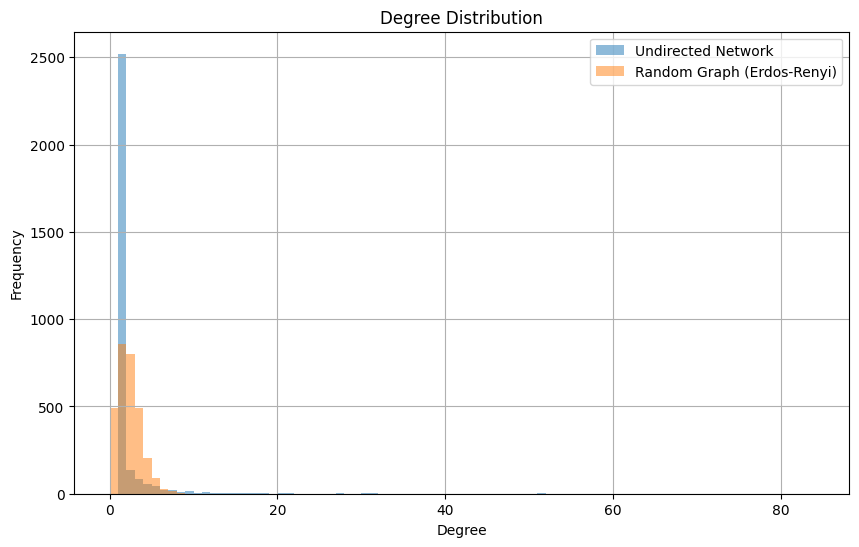

In [5]:
# Q2. Code
# convert the directed graph to an undirected graph
undirected_graph = graph.to_undirected()

# calculate the number of edges in the undirected graph
num_edges_undirected = undirected_graph.number_of_edges()

# calculate the probability for the Erdos-Renyi model
num_nodes = undirected_graph.number_of_nodes()
p = num_edges_undirected / (num_nodes * (num_nodes - 1) / 2)

# generate a random graph using the Erdos-Renyi model
random_graph = nx.erdos_renyi_graph(num_nodes, p)

# compute degree distributions for the undirected graph and random graph
degree_dist_undirected = [degree for node, degree in undirected_graph.degree()]
degree_dist_random = [degree for node, degree in random_graph.degree()]

# Plot degree distributions
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(degree_dist_undirected, bins=range(max(degree_dist_undirected) + 2), alpha=0.5, label='Undirected Network')
ax.hist(degree_dist_random, bins=range(max(degree_dist_random) + 2), alpha=0.5, label='Random Graph (Erdos-Renyi)')
ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
ax.set_title('Degree Distribution')
ax.legend()
ax.grid(True)

plt.show()


Text for Q2:
A power-law degree distribution is characterized by a heavy tail in the histogram plot. The graph exhibits a power-law degree distribution and the random graph generated by the Erdos-Renyi model also shows a similar heavy tail, therefor the Erdos-Renyi model can be a good generative model for the true graph.

Top 10 Pages with Highest PageRank:
Page:  Holy Roman Emperor, PageRank: 0.018983229935059638
Page:  D.C., PageRank: 0.01582591678600783
Page:  Michigan, PageRank: 0.0077071115455889004
Page:  California, PageRank: 0.006579499706641827
Page:  New York, PageRank: 0.0063539773388524125
Page:  Massachusetts, PageRank: 0.005000843132115928
Page:  Pakistan, PageRank: 0.004098753660958273
Page:  Berkeley, PageRank: 0.004098753660958273
Page:  Ohio, PageRank: 0.0038732312931688585
Page:  Oregon, PageRank: 0.0036477089253794445


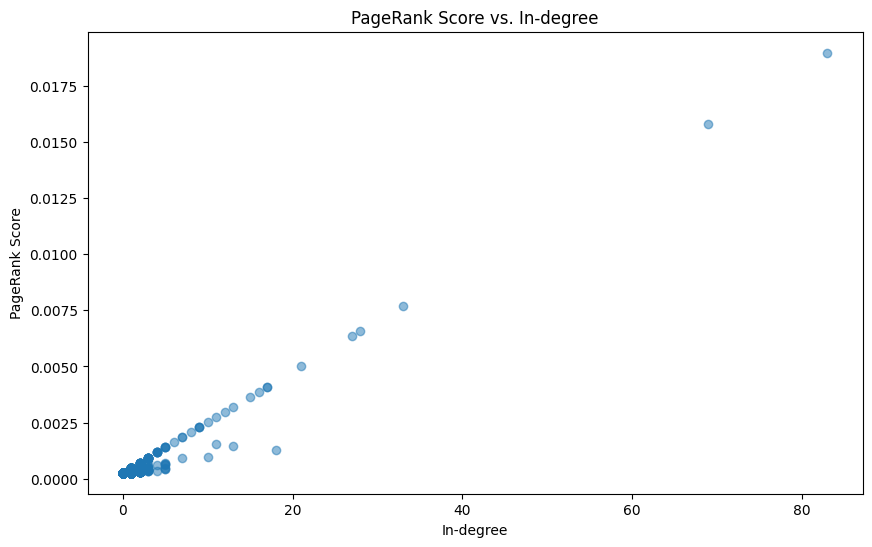

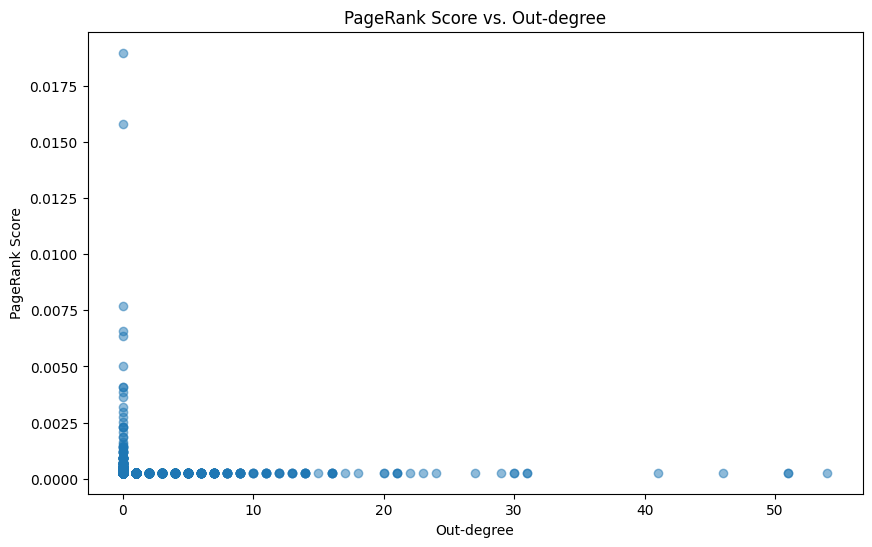

In [6]:
# Q3. Code

# run PageRank algorithm
pagerank = nx.pagerank(graph, alpha=0.85, tol=1e-6)

# get the ten pages with the highest PageRank values
top_pages = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

# print the ten pages with the highest PageRank values
print("Top 10 Pages with Highest PageRank:")
for page, score in top_pages:
    print(f"Page: {page}, PageRank: {score}")

# get the in-degrees and PageRank scores of the pages
in_degrees = dict(graph.in_degree())
in_degrees_values = np.array(list(in_degrees.values()))
pagerank_values = np.array(list(pagerank.values()))

# plot the scatter plot of PageRank score vs. in-degree
plt.figure(figsize=(10, 6))
plt.scatter(in_degrees_values, pagerank_values, alpha=0.5)
plt.xlabel('In-degree')
plt.ylabel('PageRank Score')
plt.title('PageRank Score vs. In-degree')
plt.show()

# get the out-degrees and PageRank scores of the pages
out_degrees = dict(graph.out_degree())
out_degrees_values = np.array(list(out_degrees.values()))

# plot the scatter plot of PageRank score vs. out-degree
plt.figure(figsize=(10, 6))
plt.scatter(out_degrees_values, pagerank_values, alpha=0.5)
plt.xlabel('Out-degree')
plt.ylabel('PageRank Score')
plt.title('PageRank Score vs. Out-degree')
plt.show()


Text for Q3.:
The first plot shows the relationship between PageRank score and in-degree for nodes in a graph, with a few nodes having a high in-degree and PageRank score, suggesting they are central within the network. The majority of nodes have lower in-degrees and PageRank scores, indicating a typical scale-free network with few hubs and many peripheral nodes. The second plot illustrates the PageRank score versus out-degree, and it displays a less pronounced correlation; most nodes have low out-degrees and PageRank scores with only a few outliers. Both plots exhibit the characteristic of real-world networks where most nodes are not highly connected, but a small number play a significant role in the network's connectivity.


In [7]:
# Q4. Code
#i used the library pandas to read a CSV file into a DataFrame

with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    df = pd.read_csv(f, delimiter='\t')

# create a directed graph from the DataFrame
graph = nx.from_pandas_edgelist(df, source='page_title_from', target='page_title_to', create_using=nx.DiGraph)

# topic set containing all pages containing "Sports" in their name
topic_sports = [node for node in graph.nodes() if "Sports" in str(node)]

# check if the topic set is not empty
if not topic_sports:
    print("Topic set 'Sports' is empty. Cannot run Topic-Specific PageRank.")
else:
    # run Topic-Specific PageRank with the given topic
    pagerank_topic_sports = nx.pagerank(graph, alpha=0.85, personalization={node: 1 for node in topic_sports})

    # get the top 10 pages with the highest Topic-Specific PageRank scores and display it
    top_pages_sports = sorted(pagerank_topic_sports.items(), key=lambda x: x[1], reverse=True)[:10]

    print("Top 10 Pages with Highest Topic-Specific PageRank (Topic: Sports):")
    for page, score in top_pages_sports:
        print(f"Page: {page}, Topic-Specific PageRank: {score}")



# now we are doing for all pages containing "Atheism" in their name
topic_atheism = [node for node in graph.nodes() if "Atheism" in str(node)]

# check if the topic set is not empty
if not topic_atheism:
    print("Topic set 'Atheism' is empty. Cannot run Topic-Specific PageRank.")
else:
    # run Topic-Specific PageRank with the given topic
    pagerank_topic_atheism = nx.pagerank(graph, alpha=0.85, personalization={node: 1 for node in topic_atheism})

    # get the top 10 pages with the highest Topic-Specific PageRank scores and display it
    top_pages_atheism = sorted(pagerank_topic_atheism.items(), key=lambda x: x[1], reverse=True)[:10]

    print("Top 10 Pages with Highest Topic-Specific PageRank (Topic: Atheism):")
    for page, score in top_pages_atheism:
        print(f"Page: {page}, Topic-Specific PageRank: {score}")

Top 10 Pages with Highest Topic-Specific PageRank (Topic: Sports):
Page: Sports Car Club of America, Topic-Specific PageRank: 0.04965279798113597
Page: Auto racing, Topic-Specific PageRank: 0.04434455170512064
Page: Sports governing body, Topic-Specific PageRank: 0.04338373897513318
Page: Mind Sports Organisation, Topic-Specific PageRank: 0.04338373897513318
Page: Sports car racing, Topic-Specific PageRank: 0.04338373897513318
Page: Formula One, Topic-Specific PageRank: 0.025300320103068506
Page: Le Mans, Topic-Specific PageRank: 0.01845176143946729
Page: Touring car racing, Topic-Specific PageRank: 0.01845176143946729
Page: Stock car racing, Topic-Specific PageRank: 0.018378250461892943
Page: NASCAR, Topic-Specific PageRank: 0.014781767856929105
Top 10 Pages with Highest Topic-Specific PageRank (Topic: Atheism):
Page: Atheism, Topic-Specific PageRank: 0.18771751141857002
Page: God, Topic-Specific PageRank: 0.025083437734067248
Page: United States, Topic-Specific PageRank: 0.0186627782

Text for Q4.:
For the "Sports" topic:

The pages with the highest Topic-Specific PageRank scores include entities related to auto racing, sports governing bodies, and various forms of motorsports such as sports car racing, Formula One, and NASCAR. Notably, the Sports Car Club of America holds the highest PageRank score in this category.
For the "Atheism" topic:

The top pages are primarily philosophical and theological in nature, reflecting discussions surrounding atheism, theism, agnosticism, and related concepts like God, logical positivism, and Occam's razor. The page for "Atheism" itself holds the highest Topic-Specific PageRank score, indicating its centrality within the network of pages related to this topic.

Number of communities found: 89
Modularity of the network division: 0.6404134146996978


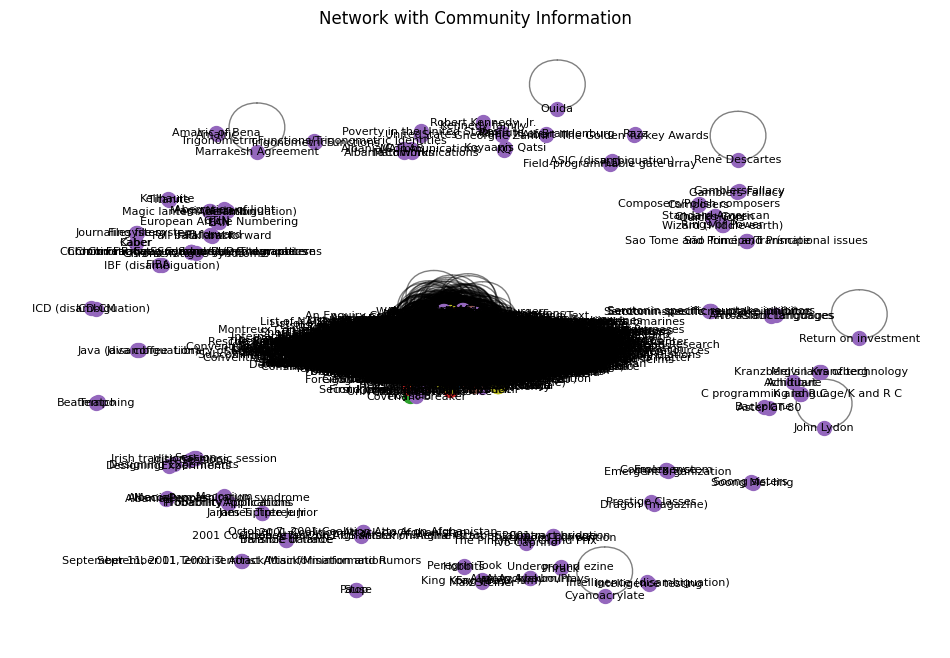

In [50]:
# Q5. Code
# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(df, source='page_title_from', target='page_title_to', create_using=nx.DiGraph())

# Convert the directed graph to an undirected graph
net_undirected = G.to_undirected()

# Run the Louvain algorithm to find the community structure
partition = community_louvain.best_partition(net_undirected)
communities = [set() for _ in range(max(partition.values()) + 1)]
for node, com in partition.items():
    communities[com].add(node)

# Report the number of communities found
num_communities = len(communities)
print(f"Number of communities found: {num_communities}")

# Compute the modularity for the network division into communities
modularity = community_louvain.modularity(partition, net_undirected)
print(f"Modularity of the network division: {modularity}")

# Unite all small communities with fewer than 100 nodes into one 'super community'
super_community_nodes = set()
small_communities = [c for c in communities if len(c) < 100]
for community_nodes in small_communities:
    super_community_nodes.update(community_nodes)

# Combine small communities into a 'super community'
super_community = list(super_community_nodes)
communities = [c for c in communities if c not in small_communities]
communities.append(super_community)

# Display the network with community information (in colors) using NetworkX
pos = nx.spring_layout(net_undirected, seed=42)
plt.figure(figsize=(12, 8))
for i, community_nodes in enumerate(communities):
    nx.draw_networkx_nodes(net_undirected, pos, nodelist=community_nodes, node_size=100, node_color=f"C{i}")
nx.draw_networkx_edges(net_undirected, pos, alpha=0.5)
nx.draw_networkx_labels(net_undirected, pos, font_size=8)
plt.title("Network with Community Information")
plt.axis("off")
plt.show()

Text for Q5.: The graph appears to represent a complex network with multiple communities, indicated by clusters of nodes possibly color-coded but not visible in this black and white depiction. A significant portion of the network is densely connected, forming a large central community with high node overlap, which is challenging to decipher. There are also several smaller, more distinct communities on the periphery, suggesting groups of nodes that are more closely related to each other within the network.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Community 1:
Most frequent words:
history: 211
geography: 201
demographics: 200
transport: 188
telecommunications: 186
economy: 174
relations: 164
foreign: 158
politics: 156
pope: 149


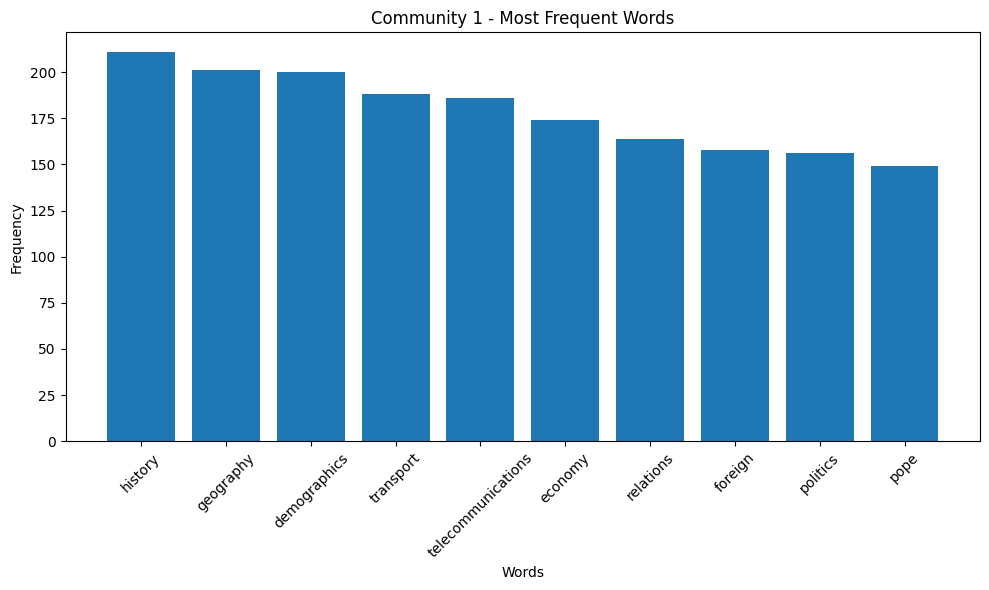

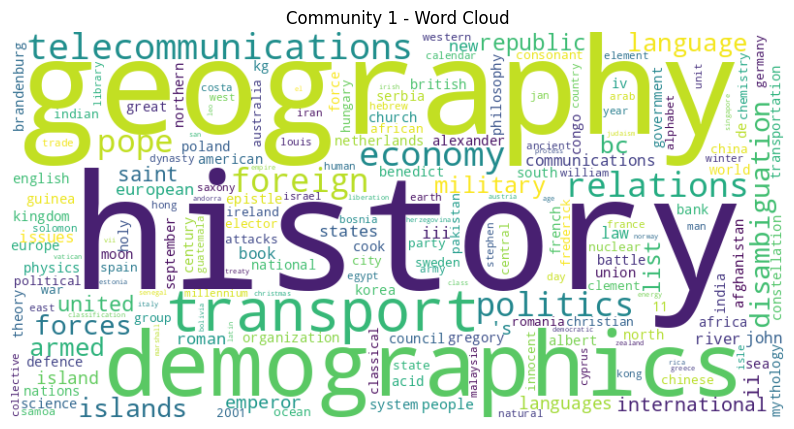

Interpretation:
This community is related to history, politics.


Community 2:
Most frequent words:
system: 71
game: 65
programming: 62
language: 60
computer: 58
's: 56
data: 53
theorem: 43
network: 41
disambiguation: 37


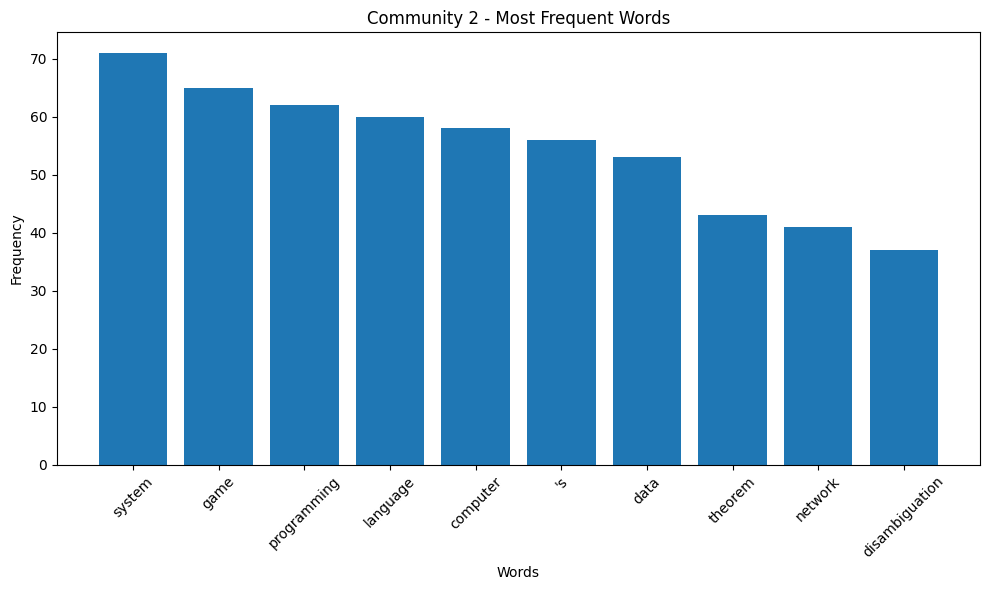

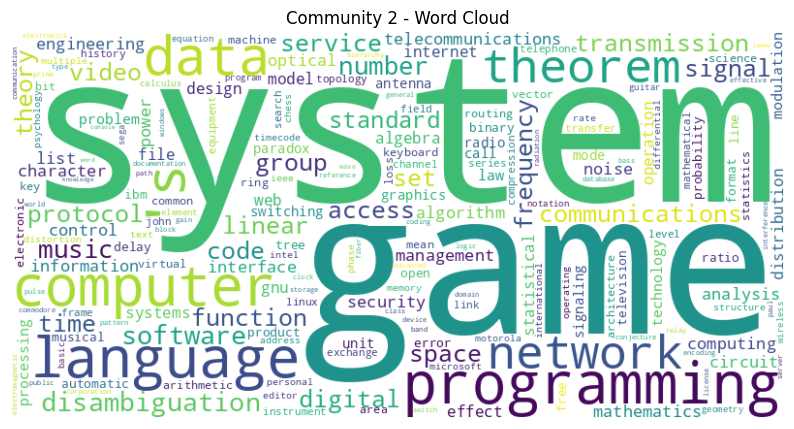

Interpretation:
This community is related to data.


Community 3:
Most frequent words:
united: 174
states: 148
election: 58
presidential: 56
history: 55
john: 53
war: 46
list: 41
super: 39
new: 38


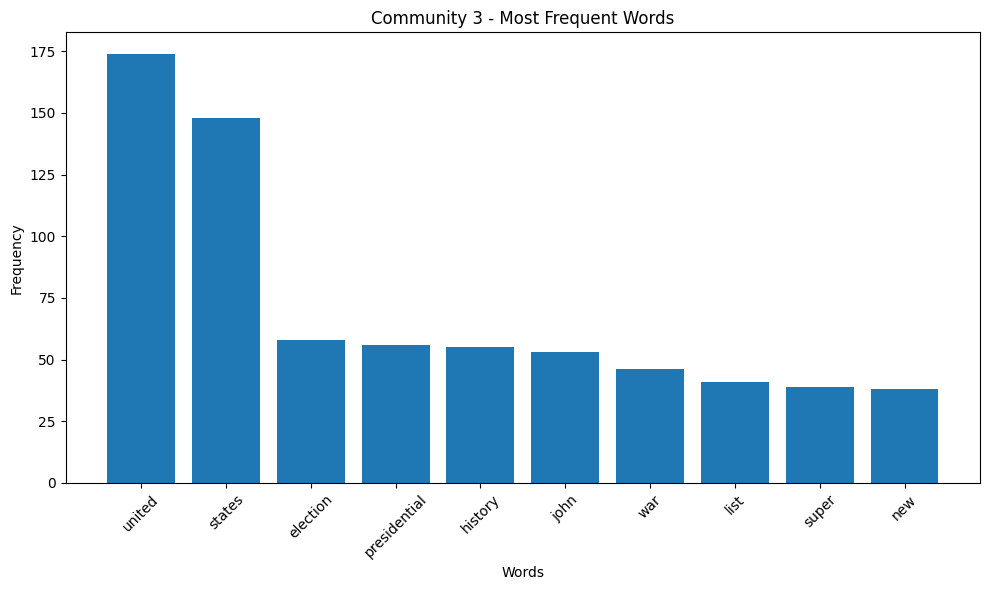

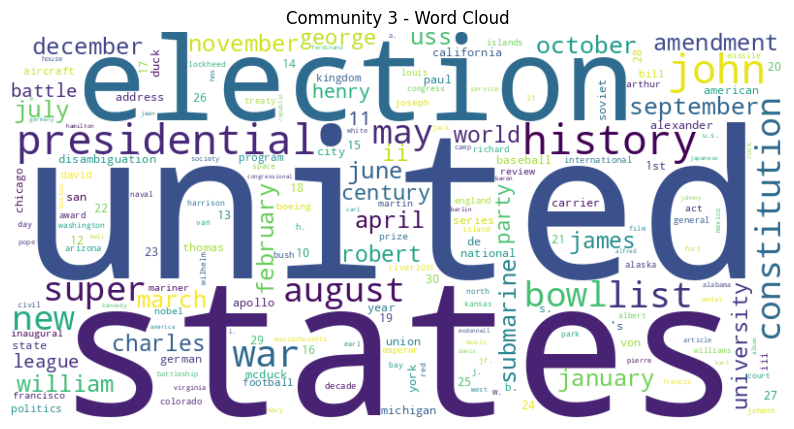

Interpretation:
This community is related to election, history.


Community 4:
Most frequent words:
film: 79
list: 47
disambiguation: 45
's: 42
fiction: 31
science: 27
star: 25
john: 22
london: 19
disease: 17


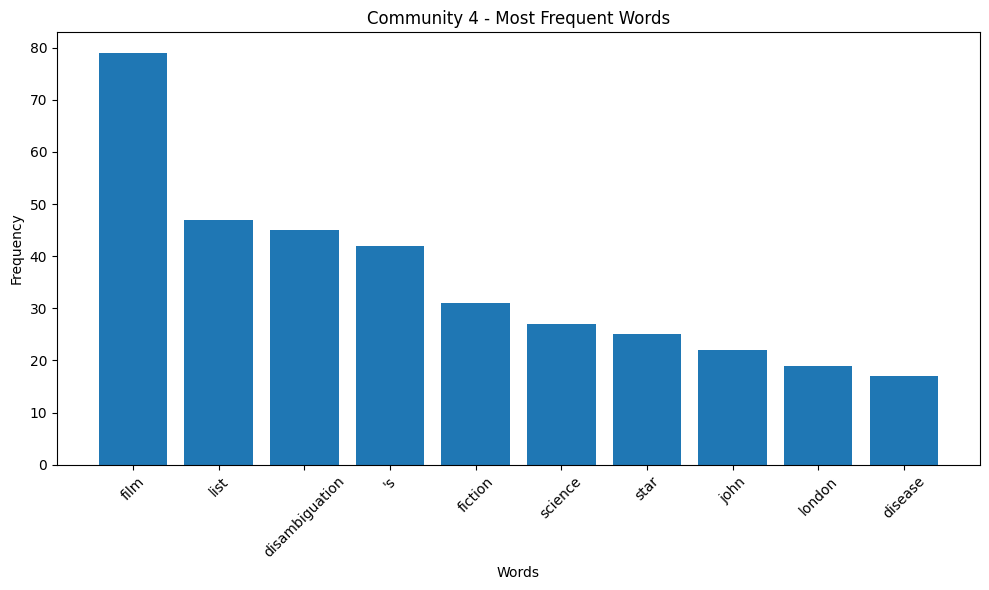

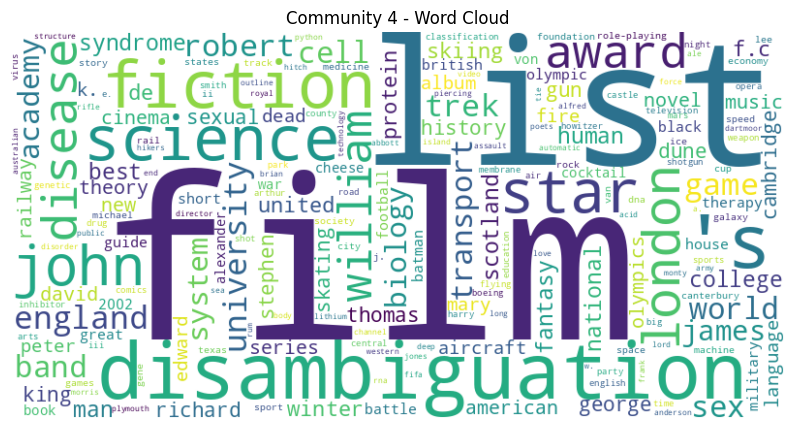

Interpretation:
This community is related to film, science.


Community 5:
Most frequent words:
ad: 100
bc: 33
emperor: 32
century: 28
pope: 21
year: 14
review: 14
decade: 12
ii: 10
empress: 8


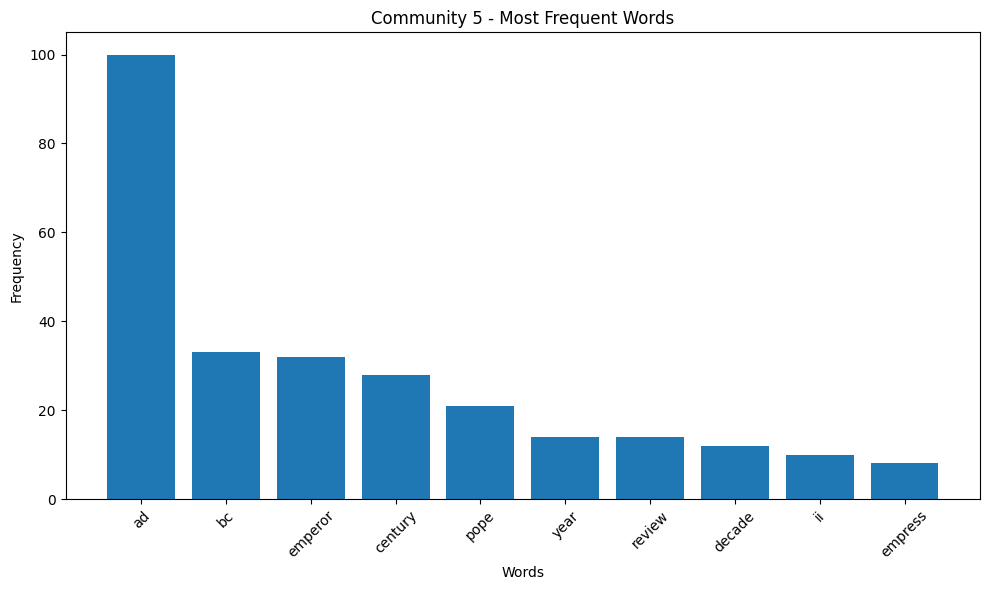

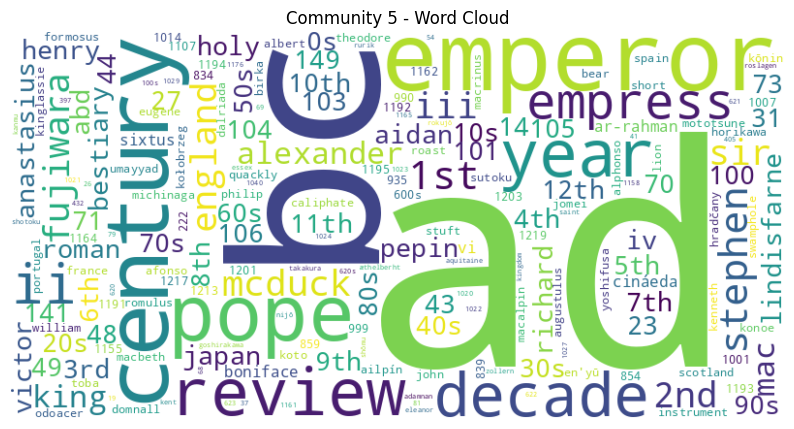

Interpretation:
The community doesn't have any dominant topic.




In [48]:
# Q6. Code
import networkx as nx
import community as community_louvain
from community.community_louvain import best_partition
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud

#in this code we used the library BeautifulSoup to parse HTML content and extract text
#the library wordcloud to generate a visual representation of word frequency in the form of a word cloud
#function to extract the html content

with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    df = pd.read_csv(f, delimiter='\t')
G = nx.from_pandas_edgelist(df, source='page_id_from', target='page_id_to', create_using=nx.DiGraph())

def extract_text(html_content):
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    # Find all text elements in the HTML content
    text_elements = soup.find_all(text=True)
    # Concatenate all text elements into a single string
    extracted_text = ' '.join(filter(lambda x: x.strip(), text_elements))
    return extracted_text

# function to clean text and extract meaningful words
def clean_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Define the list of stop words
    stop_words = set(stopwords.words('english'))
    # Filter out stop words and words with less than 2 characters
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and len(word) > 1]
    return filtered_words

# calculate the communities using Louvain algorithm
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)

# get the five largest communities
sorted_communities = sorted(communities, key=len, reverse=True)[:5]

# analyze each community and find the most frequent words
for idx, community in enumerate(sorted_communities):
    print(f"Community {idx+1}:")
    # Extract the nodes' page titles in the community
    nodes = []
    for node in community:
        node_title = df.loc[df['page_id_from'] == node]['page_title_from'].values
        if len(node_title) > 0:
            nodes.append(node_title[0])
    # combine page titles to a single string
    text_data = '\n'.join(nodes)
    # clean the text data
    cleaned_text = clean_text(text_data)
    # count the frequency of words
    word_count = Counter(cleaned_text)
    # get the most common words and their counts
    most_common_words = word_count.most_common(10)
    # display the most frequent words in the community
    print("Most frequent words:")
    for word, count in most_common_words:
        print(f"{word}: {count}")
    # create a bar plot for the most common words
    plt.figure(figsize=(10, 6))
    plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Community {idx+1} - Most Frequent Words")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # create a word cloud to visualize the most common words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Community {idx+1} - Word Cloud")
    plt.show()
    # interpretation based on most frequent words
    print("Interpretation:")

    dominant_topics = []
    for word, count in most_common_words:
        if word.lower() in ["election", "politics", "history", "art", "film", "science", "data"]:
            dominant_topics.append(word.lower())

    if dominant_topics:
        print(f"This community is related to {', '.join(dominant_topics)}.")
    else:
        print("The community doesn't have any dominant topic.")
    print("\n")



Text for Q6.: